In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer

#Clustering
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.stats import zscore

#PCA
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Problem 1

### 1.1

In [2]:
data = pd.read_excel('Clustering Clean Ads_Data-2.xlsx')
data.shape

(23066, 19)

In [3]:
data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [5]:
data.InventoryType.value_counts()

Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64

In [6]:
data.Platform.value_counts()

Video    9873
Web      8251
App      4942
Name: Platform, dtype: int64

In [7]:
data.Format.value_counts()

Video      11552
Display    11514
Name: Format, dtype: int64

In [8]:
data['Ad Type'].value_counts()

Inter224    1658
Inter217    1655
Inter223    1654
Inter221    1650
Inter219    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int64

In [9]:
data.describe()

Ad - Length     Ad- Width        Ad Size  Available_Impressions  \
count  23066.000000  23066.000000   23066.000000           2.306600e+04   
mean     385.163097    337.896037   96674.468048           2.432044e+06   
std      233.651434    203.092885   61538.329557           4.742888e+06   
min      120.000000     70.000000   33600.000000           1.000000e+00   
25%      120.000000    250.000000   72000.000000           3.367225e+04   
50%      300.000000    300.000000   72000.000000           4.837710e+05   
75%      720.000000    600.000000   84000.000000           2.527712e+06   
max      728.000000    600.000000  216000.000000           2.759286e+07   

       Matched_Queries   Impressions         Clicks         Spend  \
count     2.306600e+04  2.306600e+04   23066.000000  23066.000000   
mean      1.295099e+06  1.241520e+06   10678.518816   2706.625689   
std       2.512970e+06  2.429400e+06   17353.409363   4067.927273   
min       1.000000e+00  1.000000e+00       1.000000      0.000000   
25%       1.828250e+04  7.990500e+03     710.000000     85.180000   
50%       2.580875e+05  2.252900e+05    4425.000000   1425.125000   
75%       1.180700e+06  1.112428e+06   12793.750000   3121.400000   
max       1.470202e+07  1.419477e+07  143049.000000  26931.870000   

                Fee       Revenue           CTR           CPM           CPC  
count  23066.000000  23066.000000  18330.000000  18330.000000  18330.000000  
mean       0.335123   1924.252331      0.073661      7.672045      0.351061  
std        0.031963   3105.238410      0.075160      6.481391      0.343334  
min        0.210000      0.000000      0.000100      0.000000      0.000000  
25%        0.330000     55.365375      0.002600      1.710000      0.090000  
50%        0.350000    926.335000      0.082550      7.660000      0.160000  
75%        0.350000   2091.338150      0.130000     12.510000      0.570000  
max        0.350000  21276.180000      1.000000     81.560000      7.260000

In [10]:
sum(data.duplicated())

0

- There are 23066 records with 19 variables.
- Null Values in variables CTR, CPM, CPC.
- No bad records found.
- Seems like there are outliers.
- No duplicate rows.

### 1.2

In [11]:
def fillnull():
    CTR = np.where(data['CTR'].isnull(),round(data['Clicks']/data.Impressions,4),data['CTR'])
    CPM = np.where(data['CPM'].isnull(),round((data['Spend']/data.Impressions)*1000,2),data['CPM'])
    CPC = np.where(data['CPC'].isnull(),round(data['Spend']/data.Clicks,2),data['CPC'])
    return CTR,CPM,CPC

In [12]:
data['CTR'],data['CPM'],data['CPC'] = fillnull()

In [13]:
data.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

### 1.3

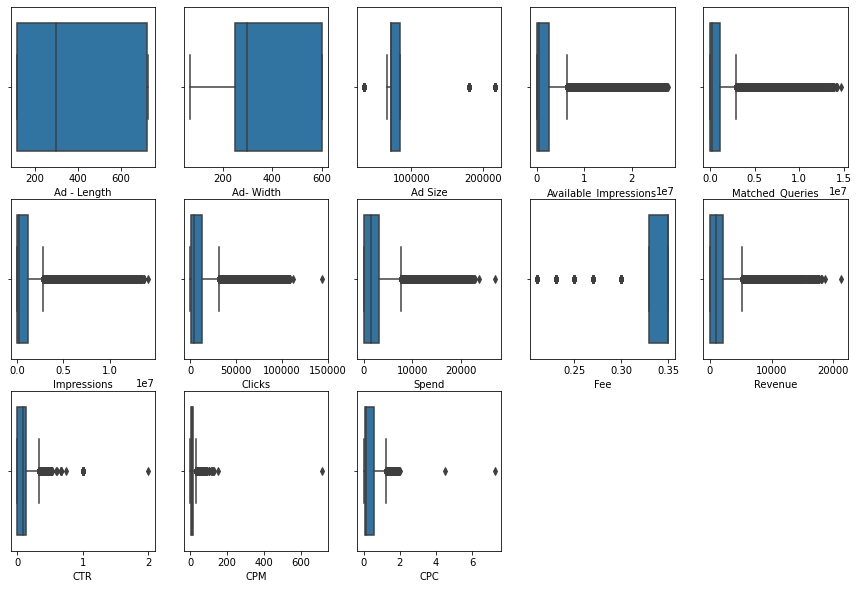

In [14]:
plt.figure(figsize = (15,10))
for i,j in enumerate(data.select_dtypes(['int64','float64'])):
    plt.subplot(int(data.select_dtypes(['int64','float64']).shape[1]/5+1),5,i+1)
    sns.boxplot(x=data[j]);

In [15]:
"""for i,j in enumerate(data.select_dtypes(['int64','float64'])):
    q1 = data[j].quantile(0.25)
    q3 = data[j].quantile(0.75)
    iqr = q3-q1
    high = q3+(1.5*iqr)
    low = q1-(1.5*iqr)
    data[j] = np.where(data[j]<low,low,data[j])
    data[j] = np.where(data[j]>high,high,data[j])"""

"for i,j in enumerate(data.select_dtypes(['int64','float64'])):\n    q1 = data[j].quantile(0.25)\n    q3 = data[j].quantile(0.75)\n    iqr = q3-q1\n    high = q3+(1.5*iqr)\n    low = q1-(1.5*iqr)\n    data[j] = np.where(data[j]<low,low,data[j])\n    data[j] = np.where(data[j]>high,high,data[j])"

In [16]:
for i,j in enumerate(data.select_dtypes(['int64','float64'])):
    std = data[j].std()
    data[j] = np.where(data[j]<(-3*std),data[j].median(),data[j])
    data[j] = np.where(data[j]>(3*std),data[j].median(),data[j])

### 1.4

### Variable selection for clustering.
- Here we are trying to segment the adds based on things like...
- - Spending
- - The Reach
- These two thins decide whether an ad campaign was successful or not.
- After trying out other combinations, we now take CTR for Reach test, CPM, CPC for the Cost and also Revenue.

In [17]:
data_scaled = data[['CPM','CTR','CPC']].apply(zscore)
data_scaled.describe()

CPM           CTR           CPC
count  2.306600e+04  2.306600e+04  2.306600e+04
mean  -5.421639e-17  3.943010e-17  9.364649e-17
std    1.000022e+00  1.000022e+00  1.000022e+00
min   -1.232385e+00 -1.039807e+00 -1.084870e+00
25%   -9.614897e-01 -1.004551e+00 -7.484834e-01
50%    6.326809e-02  2.321268e-01 -5.616020e-01
75%    7.505679e-01  7.392731e-01  7.465681e-01
max    2.973456e+00  2.725822e+00  2.727511e+00

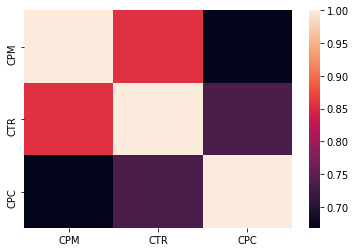

In [18]:
sns.heatmap(abs(data_scaled.corr()));

In [19]:
pca = PCA(n_components=2)
output = pca.fit_transform(data_scaled)

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.83624324, 0.95462911])

In [21]:
output[:,0].shape

(23066,)

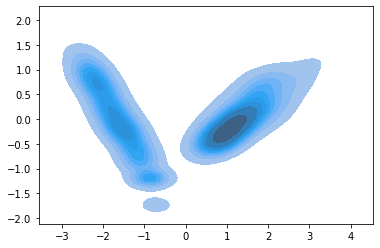

In [22]:
sns.kdeplot(x=output[:,0],y=output[:,1],shade=True);

### 1.5

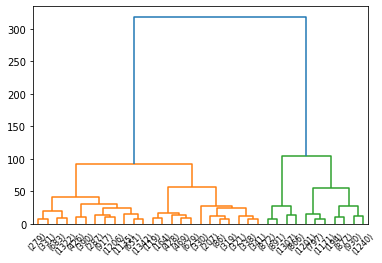

In [23]:
ward = linkage(data_scaled, method='ward')
dend = dendrogram(ward, truncate_mode='lastp',p=35)

- The ideal clusters as per dendrogram are 2. We will take that.

In [24]:
clusters = fcluster(ward, criterion='maxclust',t=2)

In [25]:
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [26]:
pd.Series(clusters).value_counts()

1    12720
2    10346
dtype: int64

- Both clusters have good number of points.

In [27]:
silhouette_score(data_scaled, clusters)

0.6589348172024926

In [28]:
sum(silhouette_samples(data_scaled, clusters)<0)

22

In [29]:
data['clusters'] = clusters

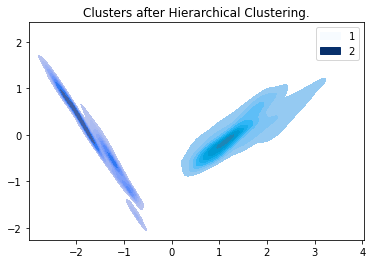

In [30]:
plt.title('Clusters after Hierarchical Clustering.')
sns.kdeplot(x=output[:,0],y=output[:,1],shade=True,palette='Blues',hue=clusters);

### 1.6

In [31]:
wss = []
labels_ = []
scores = []
misclust = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(data_scaled)
    labels = km.labels_
    labels_.append(labels)
    wss.append(km.inertia_)
    if i==1:
        continue
    scores.append(silhouette_score(data_scaled, labels))
    misclust.append(sum(silhouette_samples(data_scaled, labels)<0))

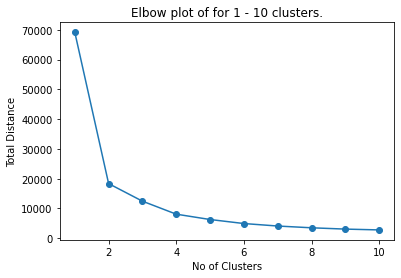

In [32]:
plt.title('Elbow plot of for 1 - 10 clusters.')
plt.xlabel("No of Clusters")
plt.ylabel("Total Distance")
plt.plot(np.arange(1,11), wss, marker="o");

- Here 4 clusters seems good enough for our data.

### 1.7

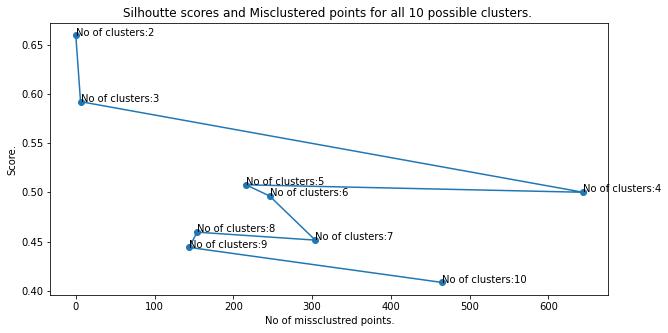

In [33]:
plt.figure(figsize=(10,5))
plt.title('Silhoutte scores and Misclustered points for all 10 possible clusters. ')
plt.xlabel("No of missclustred points.")
plt.ylabel("Score.")
for i in range(9):
    plt.annotate('No of clusters:'+str(i+2), (misclust[i],scores[i]))
plt.plot(misclust, scores, marker='o',);

In [34]:
km = KMeans(n_clusters=2)
km.fit(data_scaled)
labels = km.labels_

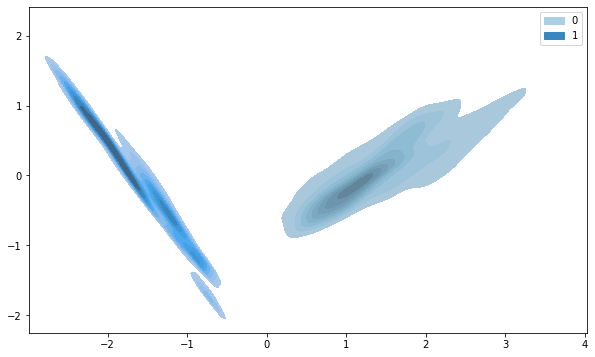

In [35]:
plt.figure(figsize=(10,6))
sns.kdeplot(x=output[:,0],y=output[:,1],shade=True,palette='Blues',hue=labels);

- Above plot strongly recommending clusters 2 or 3.
- But as we already seen in hierarchical clustering, we stick to 2 clusters.

In [36]:
data['clusters2'] = labels

### 1.8

In [37]:
data.groupby(['clusters','Device Type'])[['Clicks', 'Spend', 'Revenue',
       'CTR', 'CPM', 'CPC']].mean()

Clicks        Spend      Revenue       CTR  \
clusters Device Type                                                    
1        Desktop      8036.500877  1415.783612   978.281778  0.136719   
         Mobile       7795.678720  1409.025078   973.608476  0.136437   
2        Desktop      6453.153867  2481.237824  1692.197781  0.003327   
         Mobile       6352.839801  2484.249385  1684.002294  0.003305   

                            CPM       CPC  
clusters Device Type                       
1        Desktop      13.080846  0.098314  
         Mobile       13.037696  0.098458  
2        Desktop       1.692910  0.525876  
         Mobile        1.705514  0.526268

In [38]:
f1 = data.melt(id_vars=['clusters','Device Type'], value_vars=['Clicks','Spend','Revenue'])

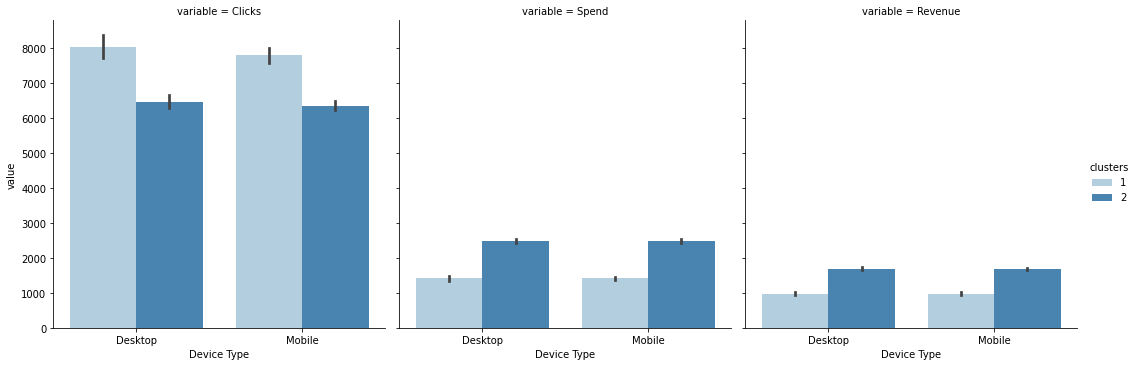

In [39]:
sns.catplot(kind = 'bar',data = f1, x='Device Type', y = 'value', hue = 'clusters', col='variable', palette='Blues');

In [40]:
f2 = data.melt(id_vars=['clusters','Device Type'], value_vars=['CPC','CTR'])

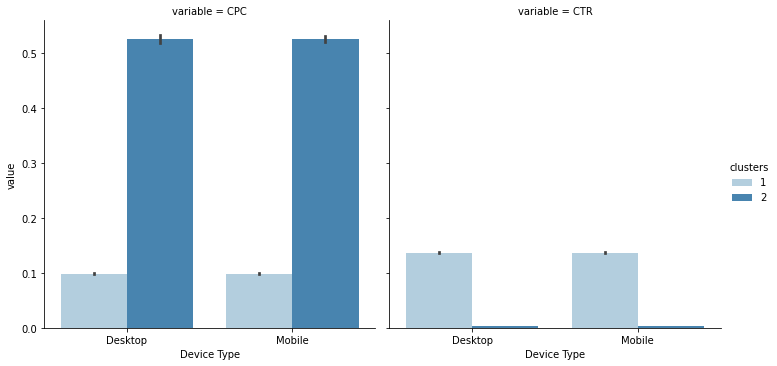

In [41]:
sns.catplot(kind = 'bar',data = f2, x='Device Type', y = 'value', hue = 'clusters', col='variable', palette='Blues');

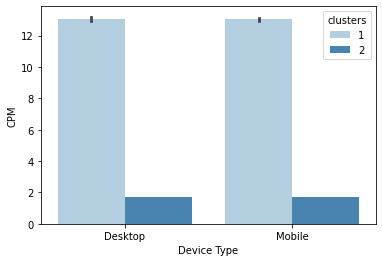

In [42]:
sns.barplot(data = data, x = 'Device Type', y = 'CPM', hue='clusters', palette='Blues');

In [43]:
data.groupby(['clusters2','Device Type'])[['Clicks', 'Spend', 'Revenue',
       'CTR', 'CPM', 'CPC']].mean()

Clicks        Spend      Revenue       CTR  \
clusters2 Device Type                                                    
0         Desktop      8053.588093  1418.757335   980.342163  0.136955   
          Mobile       7807.061257  1411.084619   975.032239  0.136594   
1         Desktop      6436.447411  2474.713842  1687.743079  0.003397   
          Mobile       6341.517267  2479.792971  1680.980868  0.003353   

                             CPM       CPC  
clusters2 Device Type                       
0         Desktop      13.098322  0.098264  
          Mobile       13.051199  0.098445  
1         Desktop       1.702168  0.524784  
          Mobile        1.709416  0.525514

In [44]:
f1 = data.melt(id_vars=['clusters2','Device Type'], value_vars=['Clicks','Spend','Revenue'])

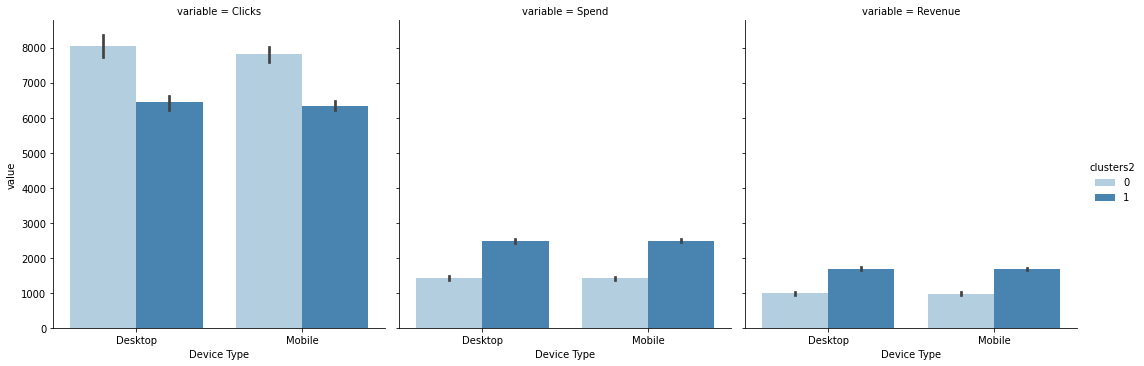

In [45]:
sns.catplot(kind = 'bar',data = f1, x='Device Type', y = 'value', hue = 'clusters2', col='variable', palette='Blues');

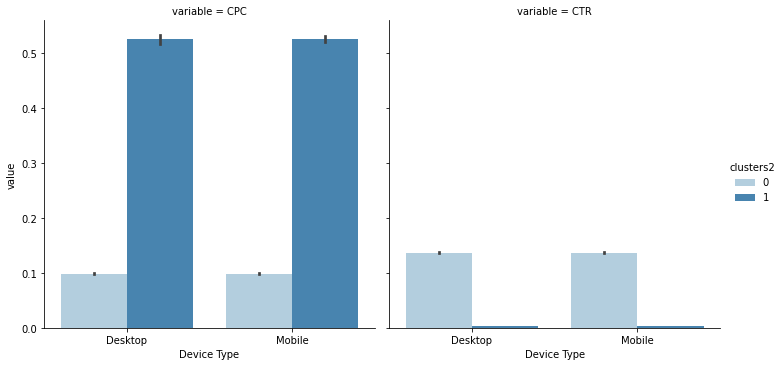

In [46]:
f2 = data.melt(id_vars=['clusters2','Device Type'], value_vars=['CPC','CTR'])
sns.catplot(kind = 'bar',data = f2, x='Device Type', y = 'value', hue = 'clusters2', col='variable', palette='Blues');

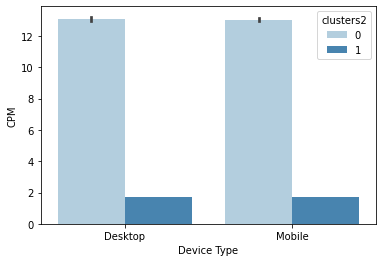

In [47]:
sns.barplot(data = data, x = 'Device Type', y = 'CPM', hue='clusters2', palette='Blues');

In [48]:
data.to_csv('final.csv')

### 1.9

#### The summary has been provided in the Project Report

# Problem 2

### 2.1

In [49]:
data = pd.read_excel("PCA India Data_Census.xlsx")
data.shape

(640, 61)

In [50]:
data.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [52]:
sum(data.duplicated())

0

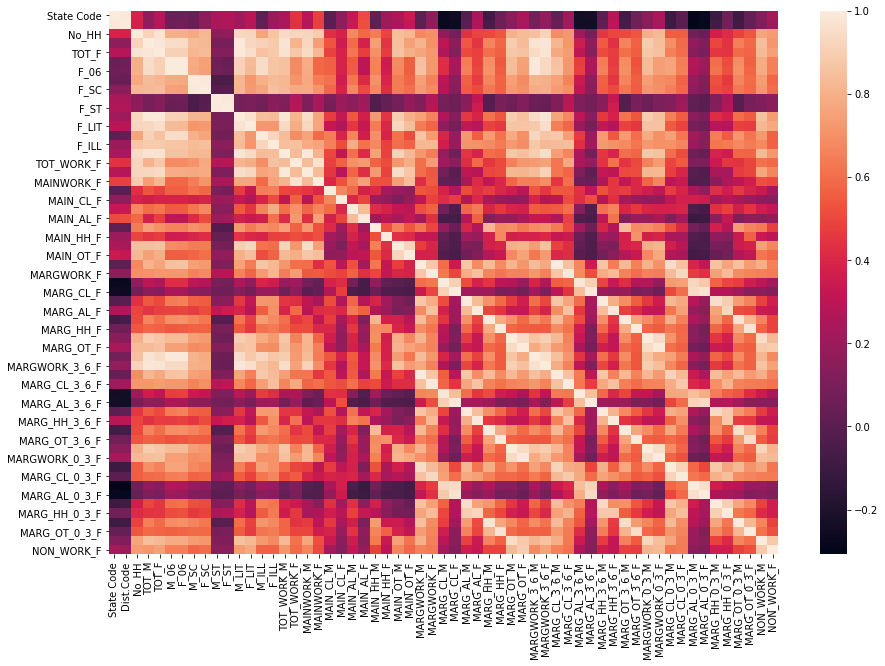

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr());

### 2.2

Let's ask some questions:
1. Which States have highest and lowest population?
2. Which State has highest literacy rate and Lowest literary rate for both Men and Women?
3. In Which state percentage of working people is high and low?
4. Which state has highest women working percentage?
5. Which State has highest Margin/Main workers ratio?
6. Which State has highest and lowest percentage of Main Cultivators?
7. Which State has highest and lowest Cultivator/Population Ratio?
8. Which State has highest and lowest Cultivators/Agricultural Labor ratio?

In [54]:
plt.rcParams['figure.figsize'] = (10,5)

In [55]:

data['Total_p'] = data.TOT_M + data.TOT_F

In [56]:
cm = mpl.cm.coolwarm

In [57]:
%matplotlib inline

#### 2.2.1

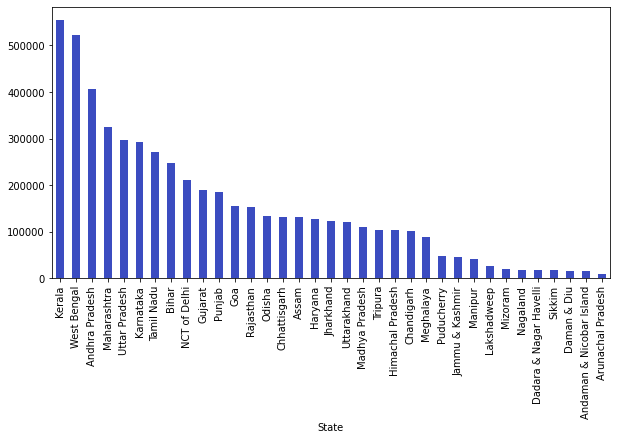

In [58]:
plt.figure(figsize=(10,5))
data.groupby('State')['Total_p'].mean().sort_values(ascending = False).plot(kind='bar',cmap=cm);

#### 2.2.2

In [59]:
data['Total_LIT'] = data.M_LIT + data.F_LIT

In [60]:
data['LIT_RATE'] = data.Total_LIT/data.Total_p

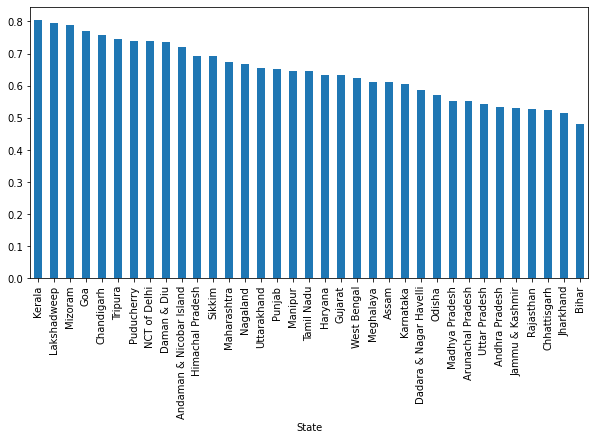

In [61]:
plt.figure(figsize=(10,5))
data.groupby('State')['LIT_RATE'].mean().sort_values(ascending = False).plot(kind='bar');

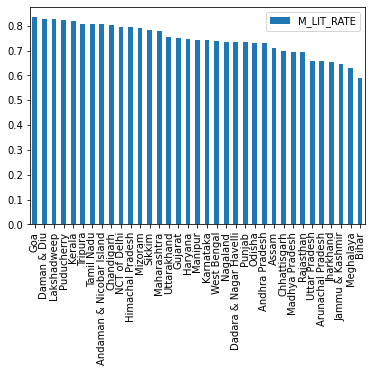

In [62]:
#MEN
x = []
y = []
for i in data.groupby('State'):
    y.append((i[1]['M_LIT']/i[1]['TOT_M']).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['M_LIT_RATE']).sort_values('M_LIT_RATE',ascending = False).plot(kind='bar');

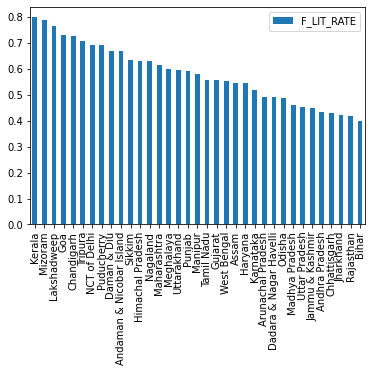

In [63]:
#WOmen
x = []
y = []
for i in data.groupby('State'):
    y.append((i[1]['F_LIT']/i[1]['TOT_F']).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['F_LIT_RATE']).sort_values('F_LIT_RATE',ascending = False).plot(kind='bar');

#### 2.2.3

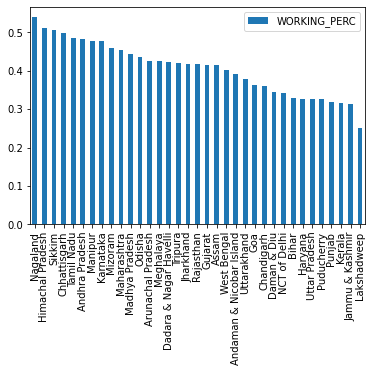

In [64]:

x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append(((t['TOT_WORK_M']+t['TOT_WORK_F'])/t['Total_p']).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['WORKING_PERC']).sort_values('WORKING_PERC',ascending = False).plot(kind='bar');

#### 2.2.4

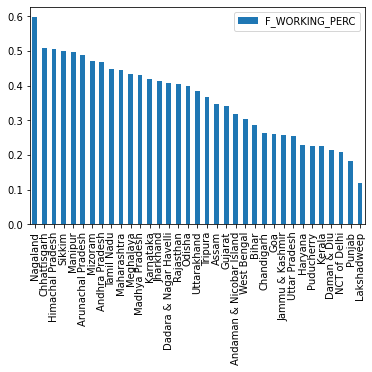

In [65]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append((t['TOT_WORK_F']/t['TOT_F']).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['F_WORKING_PERC']).sort_values('F_WORKING_PERC',ascending = False).plot(kind='bar');

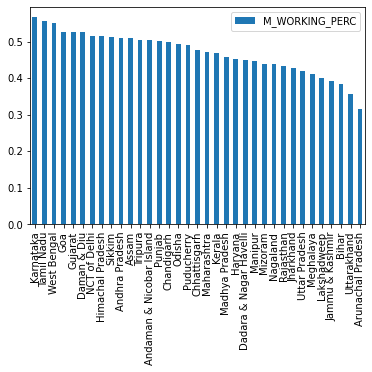

In [66]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append((t['TOT_WORK_M']/t['TOT_M']).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['M_WORKING_PERC']).sort_values('M_WORKING_PERC',ascending = False).plot(kind='bar');

#### 2.2.5

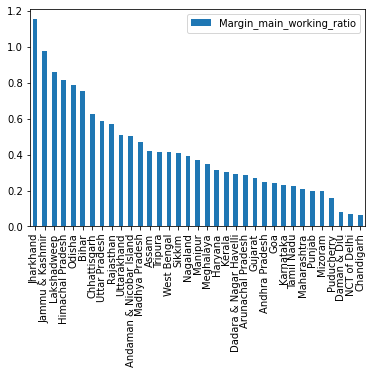

In [67]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append(((t['MARGWORK_M']+t['MARGWORK_F'])/(t['MAINWORK_M']+t['MAINWORK_F'])).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['Margin_main_working_ratio']).sort_values('Margin_main_working_ratio',ascending = False).plot(kind='bar');

#### 2.2.6

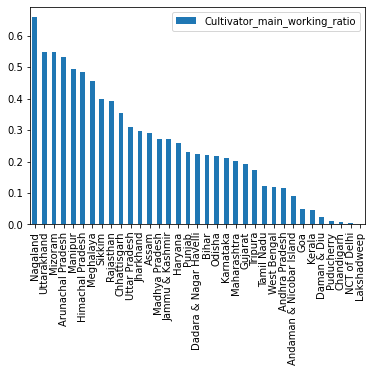

In [68]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append(((t['MAIN_CL_M']+t['MAIN_CL_F'])/(t['MAINWORK_M']+t['MAINWORK_F'])).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['Cultivator_main_working_ratio']).sort_values('Cultivator_main_working_ratio',ascending = False).plot(kind='bar');

#### 2.2.7

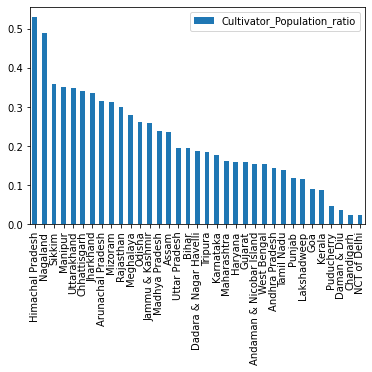

In [69]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append(((t['MAIN_CL_M']+t['MAIN_CL_F']+t['MARG_CL_3_6_M']+t['MARG_CL_3_6_F']+t['MARG_CL_0_3_M']+t['MARG_CL_0_3_F']+t['MARG_CL_M']+t['MARG_CL_F'])/(t['Total_p'])).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['Cultivator_Population_ratio']).sort_values('Cultivator_Population_ratio',ascending = False).plot(kind='bar');

#### 2.2.8

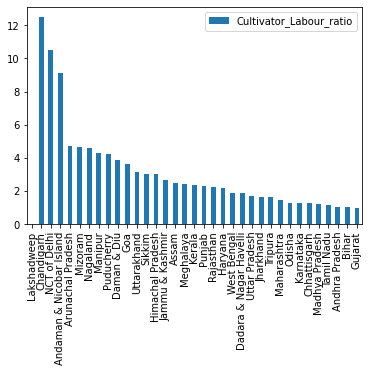

In [70]:
x = []
y = []
for i in data.groupby('State'):
    t = i[1]
    y.append(((t['MAIN_CL_M']+t['MAIN_CL_F']+t['MARG_CL_3_6_M']+t['MARG_CL_3_6_F']+t['MARG_CL_0_3_M']+t['MARG_CL_0_3_F']+t['MARG_CL_M']+t['MARG_CL_F'])/(t['MAIN_AL_M']+t['MAIN_AL_F']+t['MARG_AL_3_6_M']+t['MARG_AL_3_6_F']+t['MARG_AL_0_3_M']+t['MARG_AL_0_3_F']+t['MARG_AL_M']+t['MARG_AL_F'])).mean())
    x.append(i[0])
pd.DataFrame(y,index=x,columns=['Cultivator_Labour_ratio']).sort_values('Cultivator_Labour_ratio',ascending = False).plot(kind='bar');

In [71]:
data.drop(['Total_p', 'Total_LIT', 'LIT_RATE'],axis=1,inplace=True)

### 2.3

In [72]:
data_new = data.drop(['State Code','Dist.Code','State','Area Name'],axis=1)

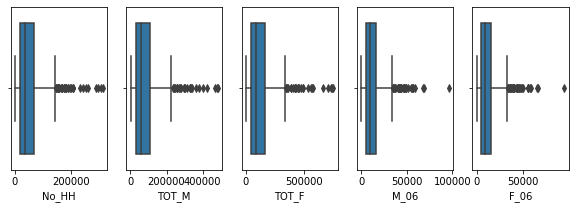

In [73]:
plt.figure(figsize=(10,3))
for i,j in enumerate(data_new.iloc[:,:5]):
    plt.subplot(1,5,i+1)
    sns.boxplot(x=data_new[j]);

### 2.4

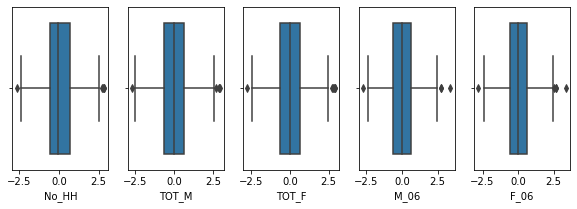

In [74]:
pt = pd.DataFrame(PowerTransformer().fit_transform(data_new), columns=data_new.columns)
plt.figure(figsize=(10,3))
for i,j in enumerate(pt.iloc[:,:5]):
    plt.subplot(1,5,i+1)
    sns.boxplot(x=pt[j]);

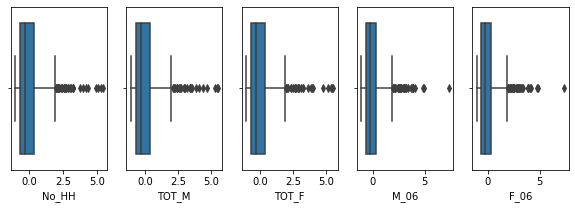

In [75]:
data_scaled = data_new.apply(zscore)
plt.figure(figsize=(10,3))
for i,j in enumerate(data_scaled.iloc[:,:5]):
    plt.subplot(1,5,i+1)
    sns.boxplot(x=data_scaled[j]);

### 2.5

In [76]:
covar = data_scaled.cov()
covar.shape

(57, 57)

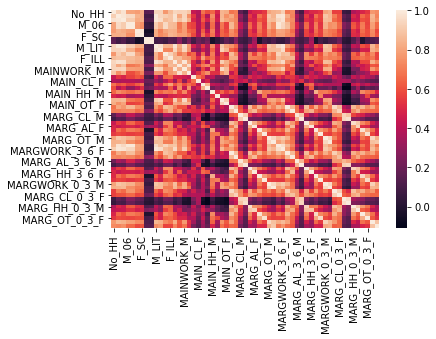

In [77]:
sns.heatmap(covar);

In [112]:
#test for correlation significance.
_, p = calculate_bartlett_sphericity(data_scaled)
p

0.0

In [114]:
#test for sample adequacy 
_,p = calculate_kmo(data_scaled)
p

0.8039889932781795

In [80]:
#PCA
pca = PCA(n_components=0.90)
output = pca.fit_transform(data_scaled)

In [81]:
output.shape

(640, 6)

In [82]:
#eigen vectors
df_eigen = pd.DataFrame(pca.components_.T,columns=['Eigen'+str(i) for i in range(1,7)],index=data_scaled.columns)
df_eigen.head()

Eigen1    Eigen2    Eigen3    Eigen4    Eigen5    Eigen6
No_HH  0.156021 -0.126347 -0.002690 -0.125293 -0.007022  0.004083
TOT_M  0.167118 -0.089677  0.056698 -0.019942 -0.033026 -0.073389
TOT_F  0.165553 -0.104912  0.038749 -0.070873 -0.012847 -0.043647
M_06   0.162193 -0.022095  0.057788  0.011917 -0.050248 -0.157957
F_06   0.162566 -0.020271  0.050126  0.014844 -0.043848 -0.154436

In [83]:
#eigen values
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [84]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

In [85]:
df_pca = pd.DataFrame(output, columns = ['PC'+str(i) for i in range(1,7)])
df_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -4.617263  0.138116  0.328545  1.543697  0.353737 -0.420947
1 -4.771662 -0.105865  0.244449  1.963215 -0.153884  0.417310
2 -5.964836 -0.294347  0.367393  0.619543  0.478199  0.276580
3 -6.280796 -0.500384  0.212701  1.074516  0.300799  0.051158
4 -4.478566  0.894154  1.078277  0.535556  0.804065  0.341677

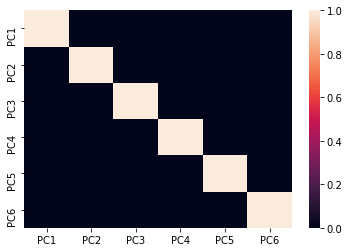

In [86]:
sns.heatmap(df_pca.corr());

### 2.6

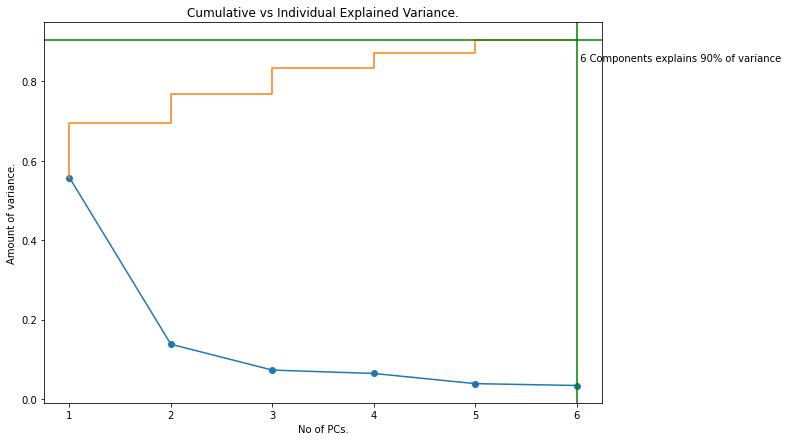

In [87]:
plt.figure(figsize=(10,7))
plt.xlabel('No of PCs.')
plt.ylabel("Amount of variance.")
plt.title("Cumulative vs Individual Explained Variance.")
plt.plot(np.arange(1,7), pca.explained_variance_ratio_, marker = 'o');
plt.step(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_),where='pre');
plt.axvline(x=6, color = "green" );
plt.axhline(y=np.cumsum(pca.explained_variance_ratio_)[5], color = "green" );
plt.annotate(" 6 Components explains 90% of variance",(6,0.85));

In [88]:
import plotly.express as px

In [89]:
def step(x,y):
    x1 =[]
    y1 = []
    for i in x:
        x1.append(i)
        x1.append(i)
    del x1[-1]
    y1.append(y[0])
    for i in y[1:]:
        y1.append(i)
        y1.append(i)
    return x1,y1    
        

In [90]:
x=np.arange(1,7)
y=pca.explained_variance_ratio_

In [91]:
x1,y1 = step(x,np.cumsum(y))

In [92]:
fig = px.line(x=x1, y=y1)
fig.add_scatter(x=x, y=y)
fig.show()

### 2.7

In [93]:
df_eigen_abs = df_eigen.apply(abs)

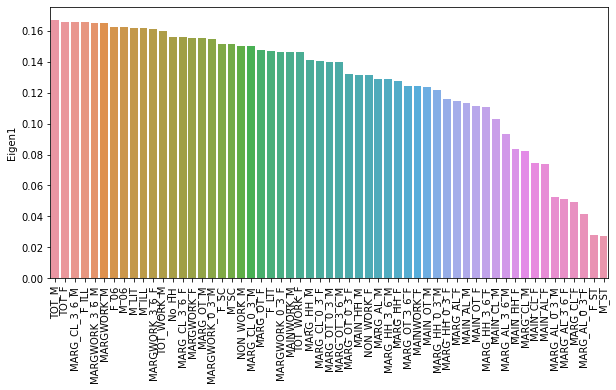

In [94]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen1'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

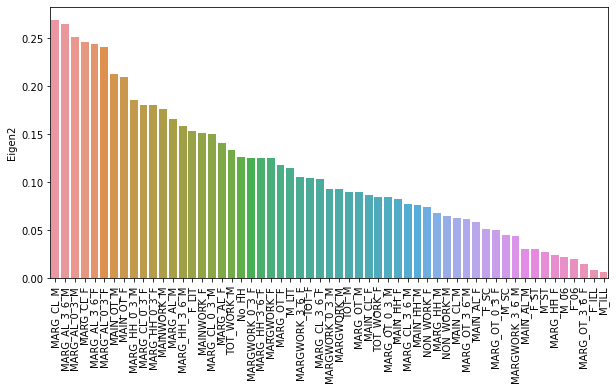

In [95]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen2'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

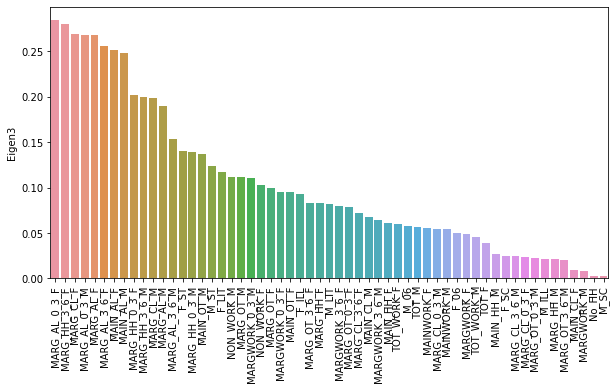

In [96]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen3'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

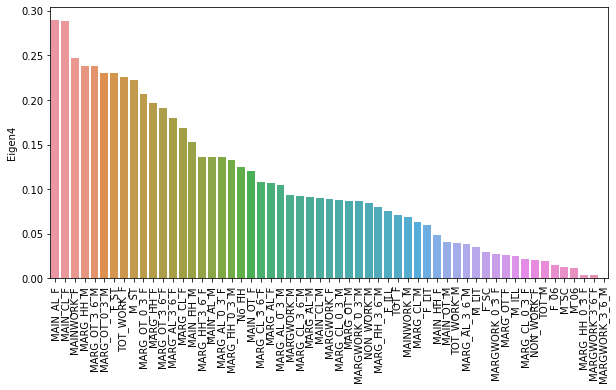

In [97]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen4'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

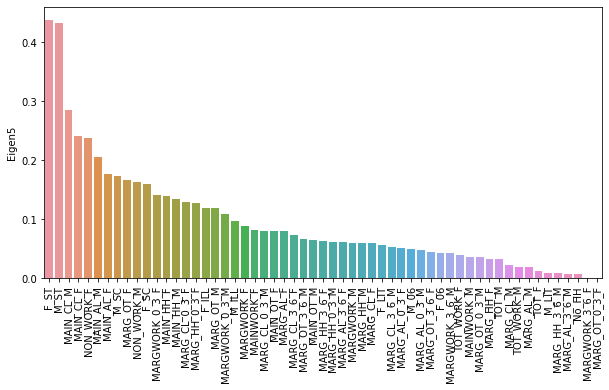

In [98]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen5'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

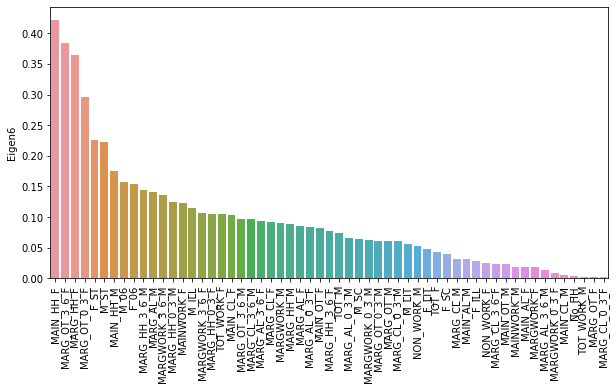

In [99]:
plt.figure(figsize=(10,5))
temp = df_eigen_abs['Eigen6'].sort_values(ascending = False)
sns.barplot(x=temp.index, y=temp);
plt.xticks(rotation = 90);

In [100]:
for i in df_eigen.columns:
    print(i+":\n")
    print(df_eigen_abs[i].sort_values(ascending=False)[:3],end="\n")

Eigen1:

TOT_M            0.167118
TOT_F            0.165553
MARG_CL_3_6_M    0.165502
Name: Eigen1, dtype: float64
Eigen2:

MARG_CL_M        0.269450
MARG_AL_3_6_M    0.264409
MARG_AL_0_3_M    0.251328
Name: Eigen2, dtype: float64
Eigen3:

MARG_AL_0_3_F    0.284956
MARG_HH_3_6_F    0.279866
MARG_CL_F        0.268787
Name: Eigen3, dtype: float64
Eigen4:

MAIN_AL_F     0.290042
MAIN_CL_F     0.288965
MAINWORK_F    0.246640
Name: Eigen4, dtype: float64
Eigen5:

F_ST         0.438792
M_ST         0.433163
MAIN_CL_M    0.286039
Name: Eigen5, dtype: float64
Eigen6:

MAIN_HH_F        0.422309
MARG_OT_3_6_F    0.384552
MARG_HH_F        0.365112
Name: Eigen6, dtype: float64


### 2.8

In [101]:
pca.components_.shape

(6, 57)

In [102]:
data_scaled.shape

(640, 57)

In [103]:
first = pca.components_[0].reshape(1,-1)@data_scaled.T

In [104]:
first.shape

(1, 640)

In [105]:
first == output[:,0].reshape(1,-1)

0      1      2      3      4      5      6      7      8      9    ...  \
0  True  False  False  False  False  False  False  False  False  False  ...   

     630    631    632    633    634    635    636    637    638   639  
0  False  False  False  False  False  False  False  False  False  True  

[1 rows x 640 columns]

In [106]:
output[:,0].reshape(1,-1).shape

(1, 640)

In [107]:
first

0         1         2         3         4         5         6    \
0 -4.617263 -4.771662 -5.964836 -6.280796 -4.478566 -3.319963 -5.021393   

        7         8        9    ...      630       631       632      633  \
0 -4.608709 -5.186703 -4.22619  ...  0.23129  2.233075 -0.425308 -6.46281   

        634       635       636       637       638       639  
0 -3.600282 -6.262088 -5.767714 -6.294625 -6.223192 -5.896236  

[1 rows x 640 columns]

In [108]:
np.round(output[:,0],3) == np.round(first,3)

0     1     2     3     4     5     6     7     8     9    ...   630  \
0  True  True  True  True  True  True  True  True  True  True  ...  True   

    631   632   633   634   635   636   637   638   639  
0  True  True  True  True  True  True  True  True  True  

[1 rows x 640 columns]

In [109]:
pca.components_[0].shape

(57,)

In [110]:
for i,j in enumerate(data_scaled.columns):
    print(str(np.round(pca.components_[0][i],4))+"*"+j,end="")
    if i < 56:
        print(" + ",end="") 

0.156*No_HH + 0.1671*TOT_M + 0.1656*TOT_F + 0.1622*M_06 + 0.1626*F_06 + 0.1514*M_SC + 0.1516*F_SC + 0.0272*M_ST + 0.0282*F_ST + 0.162*M_LIT + 0.1469*F_LIT + 0.1617*M_ILL + 0.1652*F_ILL + 0.1599*TOT_WORK_M + 0.1459*TOT_WORK_F + 0.1462*MAINWORK_M + 0.124*MAINWORK_F + 0.1031*MAIN_CL_M + 0.0745*MAIN_CL_F + 0.1134*MAIN_AL_M + 0.0739*MAIN_AL_F + 0.1316*MAIN_HH_M + 0.0834*MAIN_HH_F + 0.1235*MAIN_OT_M + 0.111*MAIN_OT_F + 0.1646*MARGWORK_M + 0.1554*MARGWORK_F + 0.0824*MARG_CL_M + 0.0492*MARG_CL_F + 0.1286*MARG_AL_M + 0.1143*MARG_AL_F + 0.1409*MARG_HH_M + 0.1277*MARG_HH_F + 0.1553*MARG_OT_M + 0.1473*MARG_OT_F + 0.165*MARGWORK_3_6_M + 0.1613*MARGWORK_3_6_F + 0.1655*MARG_CL_3_6_M + 0.1556*MARG_CL_3_6_F + 0.093*MARG_AL_3_6_M + 0.0515*MARG_AL_3_6_F + 0.1286*MARG_HH_3_6_M + 0.1106*MARG_HH_3_6_F + 0.1396*MARG_OT_3_6_M + 0.1245*MARG_OT_3_6_F + 0.1543*MARGWORK_0_3_M + 0.1463*MARGWORK_0_3_F + 0.1501*MARG_CL_0_3_M + 0.1402*MARG_CL_0_3_F + 0.0525*MARG_AL_0_3_M + 0.0418*MARG_AL_0_3_F + 0.1218*MARG_HH_0_3_M 

## THE END